In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

## Importing the dataset

In [2]:
uber = pd.read_csv("uber.csv")
uber.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                200000 non-null  object 
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 12.2+ MB


In [4]:
uber.drop(["key", "pickup_datetime"], axis=1, inplace=True)

In [5]:
uber.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967153,40.767158,-73.963659,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


## Filling Missing Values of columns with their medians

In [6]:
from sklearn.impute import SimpleImputer
fill_median = SimpleImputer(strategy="median")
fill_median.fit(uber)

SimpleImputer(strategy='median')

In [7]:
uber_tr = fill_median.transform(uber)

In [8]:
uber_preprocessed = pd.DataFrame(uber_tr, columns=uber.columns)

In [9]:
uber_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_longitude   200000 non-null  float64
 2   pickup_latitude    200000 non-null  float64
 3   dropoff_longitude  200000 non-null  float64
 4   dropoff_latitude   200000 non-null  float64
 5   passenger_count    200000 non-null  float64
dtypes: float64(6)
memory usage: 9.2 MB


In [10]:
uber_preprocessed.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525299,39.923895,1.684535
std,9.901776,11.437787,7.720539,13.117375,6.794812,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733824,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967153,40.767158,-73.963659,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


## Checking correlation

In [11]:
corr_matrix = uber_preprocessed.corr()
corr_matrix["fare_amount"].sort_values(ascending=False)

fare_amount          1.000000
pickup_longitude     0.010457
passenger_count      0.010150
dropoff_longitude    0.008985
pickup_latitude     -0.008481
dropoff_latitude    -0.011013
Name: fare_amount, dtype: float64

## Checking outliers

<AxesSubplot: xlabel='pickup_longitude', ylabel='fare_amount'>

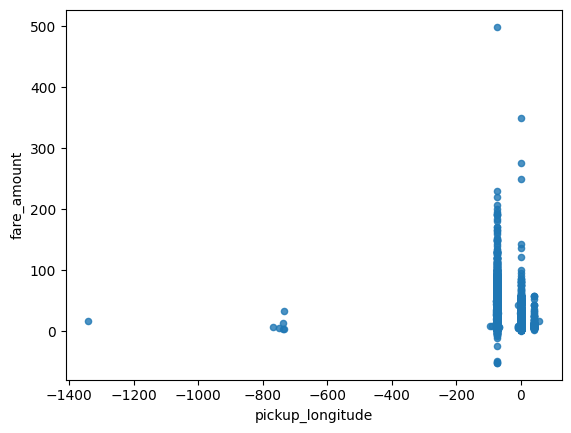

In [12]:
uber_preprocessed.plot(kind="scatter", x="pickup_longitude", y="fare_amount", alpha=0.8)

<AxesSubplot: xlabel='pickup_latitude', ylabel='fare_amount'>

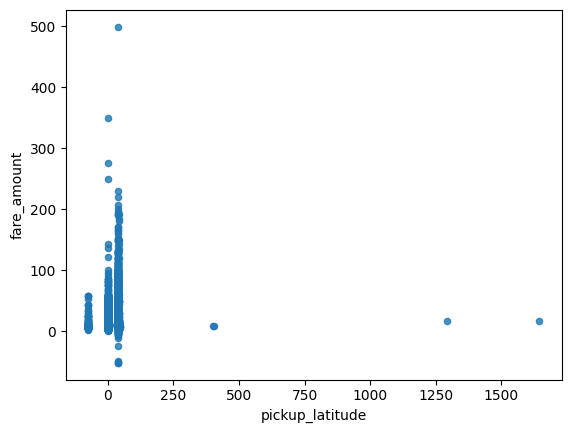

In [13]:
uber_preprocessed.plot(kind="scatter", x="pickup_latitude", y="fare_amount", alpha=0.8)

<AxesSubplot: xlabel='dropoff_longitude', ylabel='fare_amount'>

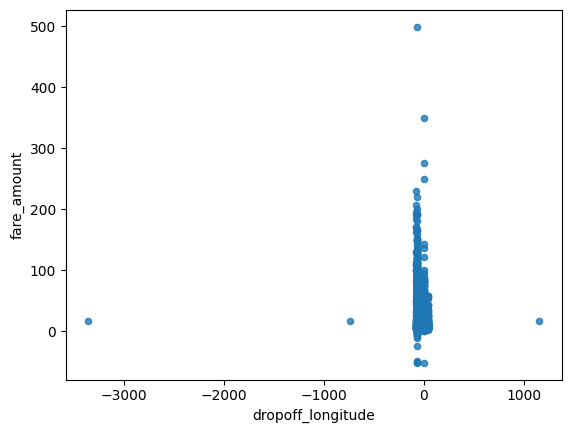

In [14]:
uber_preprocessed.plot(kind="scatter", x="dropoff_longitude", y="fare_amount", alpha=0.8)

<AxesSubplot: xlabel='dropoff_latitude', ylabel='fare_amount'>

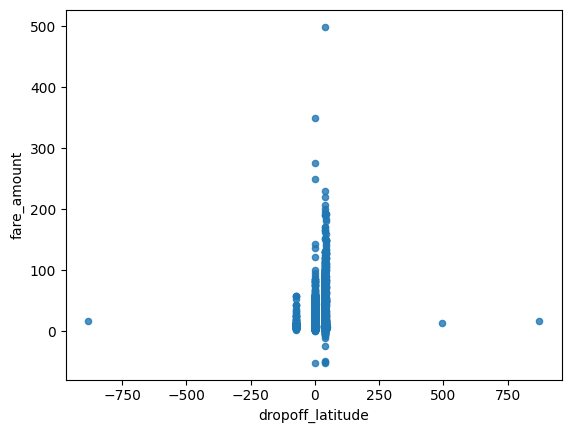

In [15]:
uber_preprocessed.plot(kind="scatter", x="dropoff_latitude", y="fare_amount", alpha=0.8)

## Separating features and labels

In [16]:
uber_features = uber_preprocessed.drop("fare_amount", axis=1).copy()
uber_labels = uber_preprocessed["fare_amount"].copy()

In [17]:
uber_labels.shape

(200000,)

In [18]:
uber_features.shape

(200000, 5)

## Scaling feature values

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
uber_scaled_features = scaler.fit_transform(uber_features)

In [20]:
uber_scaled_features

array([[-0.12871219,  0.10393968, -0.11238655,  0.11763746, -0.49389496],
       [-0.12823466,  0.10262775, -0.11202049,  0.12162699, -0.49389496],
       [-0.12916911,  0.10425264, -0.10956991,  0.12491215, -0.49389496],
       ...,
       [-0.12750567,  0.10628839, -0.10167136,  0.11312975,  0.22760936],
       [-0.12847673,  0.10226863, -0.11114419,  0.11354587, -0.49389496],
       [-0.12736386,  0.10157238, -0.11131897,  0.12434495, -0.49389496]])

## Spliting Dataset fot training and testing

In [21]:
from sklearn.model_selection import train_test_split
uber_feature_train, uber_feature_test , uber_label_train, uber_label_test = train_test_split(uber_scaled_features, uber_labels, test_size=0.2, random_state=42)

In [22]:
uber_feature_train.shape

(160000, 5)

In [23]:
uber_feature_test.shape

(40000, 5)

In [24]:
uber_label_train.shape

(160000,)

In [25]:
uber_label_test.shape

(40000,)

## Linear Regression Model

In [26]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(uber_feature_train, uber_label_train)

LinearRegression()

In [27]:
predicted_values = lin_model.predict(uber_feature_test)

## Root Mean Square Error (RMSE) For Linear Regression Model

In [28]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(uber_label_test, predicted_values)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

10.309517623421314

## R2 Score For Linear Regression Model

In [29]:
from sklearn.metrics import r2_score
lin_r2 = r2_score(uber_label_test, predicted_values)
lin_r2

0.00032789686247869376

## Random Forest Regressor

In [30]:
from sklearn.ensemble import RandomForestRegressor
rand_model = RandomForestRegressor()
rand_model.fit(uber_feature_train, uber_label_train)

RandomForestRegressor()

In [31]:
predicted_values_rand = rand_model.predict(uber_feature_test)

## RMSE For Random Forest Regressor

In [32]:
rand_mse = mean_squared_error(uber_label_test, predicted_values_rand)
rand_rmse = np.sqrt(rand_mse)
rand_rmse

5.6532877950115115

## R2 Score For Random Forest Regressor

In [33]:
rand_r2 = r2_score(uber_label_test, predicted_values_rand)
rand_r2

0.6994040867075777